In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

travel_hpi = pd.read_csv('Resources/2010 to 2019 HPI and Travel Time to Work.csv')

In [8]:
travel_hpi.head()

,Year,State,Total Estimate,Estimate Less than 5 min,Estimate 5 to 9 min,Estimate 10 to 14 min,Estimate 15 to 19 min,Estimate 20 to 24 min,Estimate 25 to 29 min,Estimate 30 to 34 min,...,% Travel 60 to 89 min,% Travel More than 90 min,% Working in County of Residence,% Working Outside County of Residence,% Working in State of Residence,% Working Outside State of Residence,% Travel Less than 20 min,% Travel 20 to 39 min,% Travel 40 to 59 min,% Travel 45 to 59 m in
0,2010,AL,1895987,59051,189676,274724,330572,301885,117283,264594,...,0.111806,0.019213,0.568210,0.360792,0.929003,0.070997,0.450437,0.388924,0.101196,0.071576
1,2010,AK,324619,30199,56593,58333,59252,44082,16062,24726,...,0.062914,0.017451,0.815196,0.179669,0.994864,0.005135,0.629590,0.277615,0.050102,0.037672
2,2010,AZ,2470950,66596,243712,346279,385741,376165,166696,390622,...,0.113126,0.016048,0.888187,0.085778,0.973965,0.026035,0.421833,0.406533,0.115229,0.072769
3,2010,AR,1189709,60584,171728,203607,207225,163084,73975,136006,...,0.080157,0.016589,0.567898,0.366222,0.934120,0.065880,0.540589,0.339123,0.074033,0.050491
4,2010,CA,15097170,346580,1331209,2102009,2350056,2255417,851250,2224075,...,0.146283,0.029972,0.703514,0.289409,0.992924,0.007076,0.406027,0.378625,0.117828,0.078736


The correlation between travel time and house index  is -0.11


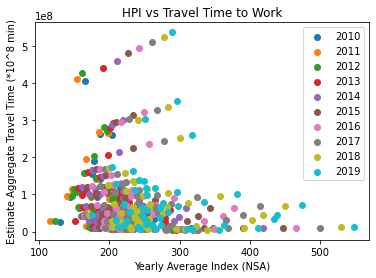

In [15]:
# Travel Time and NSA Index
years = travel_hpi.groupby('Year')
for name, group in years:
    plt.scatter(group['Yearly Average Index (NSA)'], group['Estimate Aggregate Travel Time (min)'], label=name)
plt.xlabel('Yearly Average Index (NSA)')
plt.ylabel('Estimate Aggregate Travel Time (*10^8 min)')
plt.title('HPI vs Travel Time to Work')
plt.legend()

hpiindex = travel_hpi.iloc[:,20]
travelindex = travel_hpi.iloc[:,15]
correlation = st.pearsonr(hpiindex,travelindex)
print(f"The correlation between travel time and house index  is {round(correlation[0],2)}")


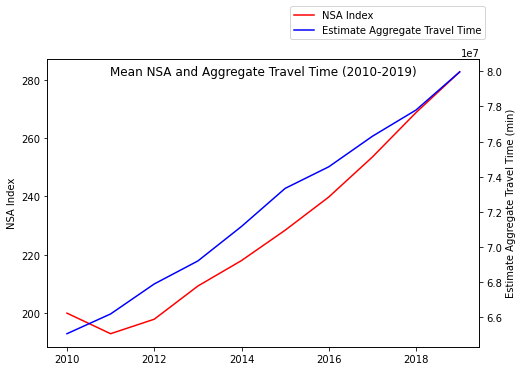

In [10]:
# NSA Index and Aggregate Travel Time over time
yearhpi = travel_hpi[['Year', 'Yearly Average Index (NSA)']]
yeartravel = travel_hpi[['Year', 'Estimate Aggregate Travel Time (min)']]

year = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
mean_nsa = yearhpi.groupby('Year').mean('Yearly Average Index (NSA)')['Yearly Average Index (NSA)']
mean_aggregate = yeartravel.groupby('Year').mean('Estimate Aggregate Travel Time (min)')['Estimate Aggregate Travel Time (min)']

fig = plt.figure()
a1 = fig.add_axes([0,0,1,1])
a1.plot(year, mean_nsa, label='NSA Index', color='r')
a1.set_ylabel('NSA Index')
a2 = a1.twinx()
a2.plot(year, mean_aggregate, label='Estimate Aggregate Travel Time', color='b')
a2.set_ylabel('Estimate Aggregate Travel Time (min)')
fig.legend(loc='upper left', bbox_to_anchor=(0.55, 1.2))
fig.suptitle('Mean NSA and Aggregate Travel Time (2010-2019)')
plt.show()

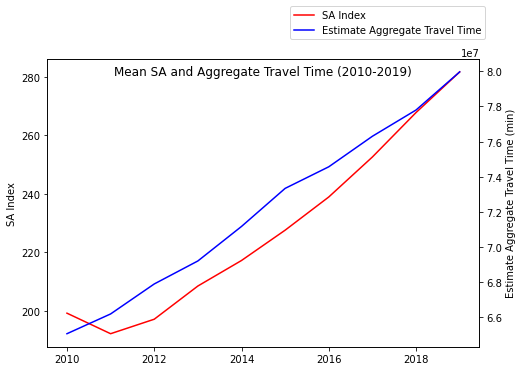

In [11]:
# SA Index and Aggregate Travel Time over time
yearhpi = travel_hpi[['Year', 'Yearly Average Index (SA)']]
yeartravel = travel_hpi[['Year', 'Estimate Aggregate Travel Time (min)']]

year = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
mean_sa = yearhpi.groupby('Year').mean('Yearly Average Index (SA)')['Yearly Average Index (SA)']
mean_aggregate = yeartravel.groupby('Year').mean('Estimate Aggregate Travel Time (min)')['Estimate Aggregate Travel Time (min)']

fig = plt.figure()
a1 = fig.add_axes([0,0,1,1])
a1.plot(year, mean_sa, label='SA Index', color='r')
a1.set_ylabel('SA Index')
a2 = a1.twinx()
a2.plot(year, mean_aggregate, label='Estimate Aggregate Travel Time', color='b')
a2.set_ylabel('Estimate Aggregate Travel Time (min)')
fig.legend(loc='upper left', bbox_to_anchor=(0.55, 1.2))
fig.suptitle('Mean SA and Aggregate Travel Time (2010-2019)')
plt.show()

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
travel_hpi.columns

Index(['Unnamed: 0', 'Year', 'State', 'Total Estimate',
       'Estimate Less than 5 min', 'Estimate 5 to 9 min',
       'Estimate 10 to 14 min', 'Estimate 15 to 19 min',
       'Estimate 20 to 24 min', 'Estimate 25 to 29 min',
       'Estimate 30 to 34 min', 'Estimate 35 to 39 min',
       'Estimate 40 to 44 min', 'Estimate 45 to 59 min',
       'Estimate 60 to 89 min', 'Estimate 90 or more min',
       'Estimate Aggregate Travel Time (min)',
       'Worked in State of Residence Estimate Aggregate (min)',
       'Worked in County of Residence Estimate Aggregate (min)',
       'Worked Outside County of Residence Estimate Aggregate (min)',
       'Worked Outside State of Residence Estimate Aggregate (min)',
       'Yearly Average Index (NSA)', 'Yearly Average Index (SA)'],
      dtype='object')

<AxesSubplot:xlabel='Year'>

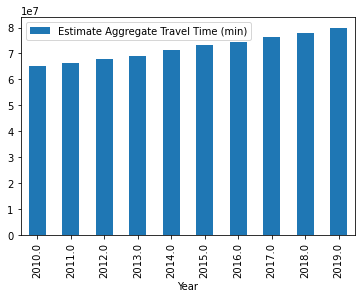

In [36]:
yeartravelhpi = travel_hpi[['Year','Estimate Aggregate Travel Time (min)','Yearly Average Index (NSA)']]
yeartravelhpi_group = yeartravelhpi.groupby('Year').mean(['Estiamte Aggregate Travel Time (min)','Yearly Average Index (NSA)']) 
x = yeartravelhpi_group.index.tolist()
y =yeartravelhpi_group['Yearly Average Index (NSA)'].tolist()
yeartravelhpi_group.plot.bar(y ='Estimate Aggregate Travel Time (min)')

<AxesSubplot:xlabel='State'>

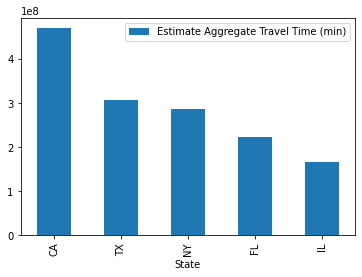

In [37]:
state = travel_hpi[['State','Estimate Aggregate Travel Time (min)']]
stategroup =state.groupby('State').mean('Estimate Aggregate Travel Time (min)')
stategrouptop = stategroup.sort_values(by='Estimate Aggregate Travel Time (min)', ascending = False)
stategrouplast = stategroup.sort_values(by='Estimate Aggregate Travel Time (min)', ascending = True)
state5= stategrouptop.iloc[:5,:]
state5.plot.bar()


<AxesSubplot:xlabel='State'>

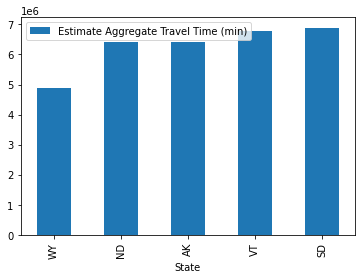

In [38]:
state5_ = stategrouplast.iloc[:5,:]
state5_.plot.bar()